# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (645-675)underperformed compared to schools with smaller budgets(<585 per student)

* Overall, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (92-84% passing vs 71%).

* Charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

### Importing necessary libraries and files


In [31]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt


# File to Load (Remember to Change These)
school_data_to_load = "./schools_complete.csv"
student_data_to_load = "./students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [32]:
# Total number of schools
total_schools = len(school_data["school_name"])

In [33]:
# Total number of students
total_students = len(school_data_complete['student_name'])

In [34]:
# Total budget
total_budget = school_data['budget'].sum()

In [35]:
# Average math score
avg_math = school_data_complete['math_score'].mean()

In [36]:
# Average reading score
avg_read = school_data_complete['reading_score'].mean()

In [37]:
# Percentage of students that passed math
math_pass_count = school_data_complete[school_data_complete['math_score'] >= 70].count()
math_pass_rate = math_pass_count['math_score'] / total_students *100


In [38]:
# Percentage of students that passed reading
reading_pass_count = school_data_complete[school_data_complete['reading_score'] >= 70].count()
reading_pass_rate = reading_pass_count['reading_score'] / total_students *100

In [39]:
# Overall passing rate
overall_pass_rate = (reading_pass_rate + math_pass_rate)/2

## District Summary

Overall, a little over 10% more students passed their Reading exam than did their Maths test. Likewise, the average reading score is 3% higher than the average math score.

In [40]:
# Create dataframe to hold variables
district_summary = pd.DataFrame({"Total Schools" : [total_schools], "Total Students":['{0:,d}'.format(total_students)], "Total Budget":['${0:,d}'.format(total_budget)], "Average Math Score" :[avg_math], "Average Reading Score":[avg_read], "%Passing Math" :[math_pass_rate], "%Passing Reading" :[reading_pass_rate], "%Overall Passing Rate" : [overall_pass_rate]})
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
0,15,"39,170","$24,649,428",78.985371,81.87784,74.980853,85.805463,80.393158


The overall passing rate is offset by math score which tends to be a little over 10% lower than reading score.

## School Summary

The following table analyses the reading and math exam success rates by school and also calculates the budget per student.

In [41]:
# Rename dataset and group by school name
grpby = school_data_complete.groupby(['school_name'])

# Calculate student count per school
#stu_tt = pd.Series(stu_total) or...
stu_total = grpby['size'].count()

# Define school type
stu_type = grpby['type'].first()

# Math average score per school
sch_math_mean = grpby['math_score'].mean()

# Average reading score per school
sch_reading_mean = grpby['reading_score'].mean()

# MATH PASSING RATE CALCULATIONS
# Count of students that passed math exam
math_pass_ct = school_data_complete[school_data_complete['math_score'] > 70].groupby('school_name')['math_score'] .count()

# Percentage of total school students that passed math exam
math_pass_rt = math_pass_ct/ stu_total*100

# READING PASSING RATE CALCULATIONS
# Count of students that passed reading exam
reading_pass_ct = school_data_complete[school_data_complete['reading_score'] > 70].groupby('school_name')['reading_score'] .count()
# Percentage of total school students that passed reading exam
reading_pass_rt = reading_pass_ct/ stu_total*100

# Overall passing rate
overall_pass_rt = (reading_pass_rt + math_pass_rt)/2

# Total School Budget
budget = grpby['budget'].first()

# Budget per student
budget_per_stu = budget / stu_total


In [42]:
# Create and print school summary dataframe 
sch_summary = pd.DataFrame({'School Type': stu_type,
                            'Total Students': stu_total,
                            'Total School Budget': budget, 
                            'Per Student Budget': budget_per_stu, 
                            'Average Math Score' : sch_math_mean, 
                            'Average Reading Score' : sch_reading_mean, 
                            '%Passing Math':math_pass_rt, 
                            '%Passing Reading': reading_pass_rt,
                            '%Overall Passing Rate': overall_pass_rt})
sch_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
school_name,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,64.630225,79.300643,71.965434
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,89.558665,93.864370,91.711518
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,63.750424,78.433367,71.091896
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,65.753925,77.510040,71.631982
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,89.713896,93.392371,91.553134
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,64.746494,78.187702,71.467098
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,90.632319,92.740047,91.686183
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,63.318478,78.813850,71.066164
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,63.852132,78.281874,71.067003


## Top Performing Schools (By Passing Rate)

The data doesn't show a positive correlation between per student budget and exam pass rates.

In [43]:
#Rename and sort school summary in descending order based on overall passing rate
sch_summary_sorted = sch_summary.sort_values(by= '%Overall Passing Rate', ascending=False)
sch_summary_sortedF = sch_summary_sorted.head()

# Format dataframe
sch_summary_sortedF1 = sch_summary_sortedF.style.format({
                            'Total Students': '{:,.0f}'.format,
                            'Total School Budget': '${:,.0f}'.format,  
                            'Per Student Budget': '${:,.0f}'.format, 
                            'Average Math Score' : '{:,.2f}'.format, 
                            'Average Reading Score' : '{:,.2f}'.format, 
                            '%Passing Math':'{:,.2f}%'.format,
                            '%Passing Reading': '{:,.2f}%'.format,
                            '%Overall Passing Rate': '{:,.2f}%'.format})
sch_summary_sortedF1

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
school_name,,,,,,,,,
Wilson High School,Charter,"2,283","$1,319,574",$578,83.27,83.99,90.93%,93.25%,92.09%
Pena High School,Charter,962,"$585,858",$609,83.84,84.04,91.68%,92.20%,91.94%
Wright High School,Charter,"1,800","$1,049,400",$583,83.68,83.95,90.28%,93.44%,91.86%
Cabrera High School,Charter,"1,858","$1,081,356",$582,83.06,83.98,89.56%,93.86%,91.71%
Holden High School,Charter,427,"$248,087",$581,83.80,83.81,90.63%,92.74%,91.69%


## Bottom Performing Schools (By Passing Rate)

Schools with the worst performances were all medium/large sized District schools.

In [44]:
#Rename and sort school summary in ascending order based on overall passing rate
sch_summary_sorted1 = sch_summary.sort_values(by= '%Overall Passing Rate', ascending=True)
sch_summary_sortedF0 = sch_summary_sorted1.head()

# Format Dataframe
sch_summary_sortedF2 = sch_summary_sortedF0.style.format({
                            'Total Students': '{:,.0f}'.format,
                            'Total School Budget': '${:,.0f}'.format,  
                            'Per Student Budget': '${:,.0f}'.format, 
                            'Average Math Score' : '{:,.2f}'.format, 
                            'Average Reading Score' : '{:,.2f}'.format, 
                            '%Passing Math':'{:,.2f}%'.format,
                            '%Passing Reading': '{:,.2f}%'.format,
                            '%Overall Passing Rate': '{:,.2f}%'.format})
sch_summary_sortedF2

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
school_name,,,,,,,,,
Rodriguez High School,District,"3,999","$2,547,363",$637,76.84,80.74,64.07%,77.74%,70.91%
Huang High School,District,"2,917","$1,910,635",$655,76.63,81.18,63.32%,78.81%,71.07%
Johnson High School,District,"4,761","$3,094,650",$650,77.07,80.97,63.85%,78.28%,71.07%
Figueroa High School,District,"2,949","$1,884,411",$639,76.71,81.16,63.75%,78.43%,71.09%
Hernandez High School,District,"4,635","$3,022,020",$652,77.29,80.93,64.75%,78.19%,71.47%


## Math Scores by Grade

This table lists the average Math Score for students of each grade level (9th, 10th, 11th, 12th) at each school.


In [45]:
# Create average maths score series for each grade using .loc conditions (groupby school name)
ninth_m = school_data_complete.loc[school_data_complete["grade"]=="9th"].groupby('school_name').mean()['math_score']
tenth_m = school_data_complete.loc[school_data_complete["grade"]=="10th"].groupby('school_name').mean()['math_score']
eleventh_m = school_data_complete.loc[school_data_complete["grade"]=="11th"].groupby('school_name').mean()['math_score']
twelfth_m = school_data_complete.loc[school_data_complete["grade"]=="12th"].groupby('school_name').mean()['math_score']

# Create datafrane 
math_score_summary = pd.DataFrame({"9th" : ninth_m,
                                   "10th" : tenth_m,
                                   "11th" : eleventh_m,
                                   "12th" : twelfth_m})
# Appending "All Schools" average row
mathScore_summary = math_score_summary.append(pd.Series(math_score_summary.mean(),name='Schools Average'))


# highlight max values per grade
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: lawngreen' if v else '' for v in is_max]
 
mathScore_summary.style.apply(highlight_max)

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.0837,76.9968,77.5156,76.4922
Cabrera High School,83.0947,83.1545,82.7656,83.2775
Figueroa High School,76.403,76.54,76.8843,77.1514
Ford High School,77.3613,77.6723,76.9181,76.18
Griffin High School,82.044,84.2291,83.8421,83.3562
Hernandez High School,77.4385,77.3374,77.136,77.1866
Holden High School,83.7874,83.4298,85,82.8554
Huang High School,77.0273,75.9087,76.4466,77.2256
Johnson High School,77.1879,76.6911,77.4917,76.8632


* On average, students across all grades scored the same in maths.
* Holden High School 9th and 11th grade students scored high scored highest in the district.

## Reading Score by Grade 

This table lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

In [46]:
# Create average reading score series for each grade using .loc conditions (groupby school name)
ninth_r = school_data_complete.loc[school_data_complete["grade"]=="9th"].groupby('school_name').mean()['reading_score']
tenth_r = school_data_complete.loc[school_data_complete["grade"]=="10th"].groupby('school_name').mean()['reading_score']
eleventh_r = school_data_complete.loc[school_data_complete["grade"]=="11th"].groupby('school_name').mean()['reading_score']
twelfth_r = school_data_complete.loc[school_data_complete["grade"]=="12th"].groupby('school_name').mean()['reading_score']

# Create dataframe
reading_score_summary = pd.DataFrame({"9th" : ninth_r,
                                   "10th" : tenth_r,
                                   "11th" : eleventh_r,
                                    "12th" : twelfth_r})
# Appending "All Schools" average row
readingScore_summary = reading_score_summary.append(pd.Series(reading_score_summary.mean(),name='Schools Average'))


#Format dataframe
reading_score_summaryF = readingScore_summary.style.format({
    '9th': '{:,.2f}%'.format,
    '10th': '{:,.2f}%'.format,
    '11th': '{:,.2f}%'.format,
    '12th': '{:,.2f}%'.format})
reading_score_summaryF

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.30%,80.91%,80.95%,80.91%
Cabrera High School,83.68%,84.25%,83.79%,84.29%
Figueroa High School,81.20%,81.41%,80.64%,81.38%
Ford High School,80.63%,81.26%,80.40%,80.66%
Griffin High School,83.37%,83.71%,84.29%,84.01%
Hernandez High School,80.87%,80.66%,81.40%,80.86%
Holden High School,83.68%,83.32%,83.82%,84.70%
Huang High School,81.29%,81.51%,81.42%,80.31%
Johnson High School,81.26%,80.77%,80.62%,81.23%


## Scores by School Spending

This table breaks down school performances based on average Spending Ranges (Per Student).

In [47]:
# Bins
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

In [48]:
# Rename school summary dataframe
bin_pd = sch_summary_sorted

# Segment and sort data into buckets by Per Student Budget
bin_pd["Spending Ranges (per student)"] = pd.cut(bin_pd["Per Student Budget"], spending_bins, labels=group_names)

# Groupby spending brackets
bin_group = bin_pd.groupby('Spending Ranges (per student)')

# Create dataframe
bin_group_summary = bin_group[["Average Math Score",
           "Average Reading Score", 
           "%Passing Math", 
           "%Passing Reading", 
           "%Overall Passing Rate"]].mean()

bin_group_summary

,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
Spending Ranges (per student),,,,,
<$585,83.455399,83.933814,90.350436,93.325838,91.838137
$585-615,83.599686,83.885211,90.788049,92.410786,91.599418
$615-645,79.079225,81.891436,73.021426,83.214343,78.117884
$645-675,76.997210,81.027843,63.972368,78.427809,71.200088


* Overall, the passing rate decreases as the budget per student increases. 
* The most import decrease in is observed in percentage of pupils passing their math exams, as it slopes down by 26% between  the two extreme range brackets.

Text(0, 0.5, '%Pass Rate')

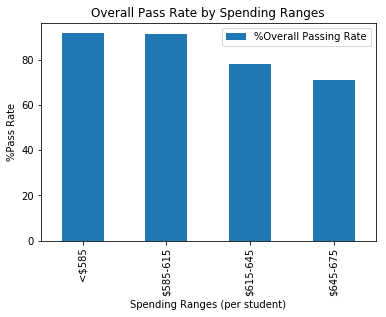

In [49]:
#PLOT GRAPH: to show decrease of overall passing rate by increasing budget bracket
#Calculate overall mean
bin_graph_data = bin_group[["%Overall Passing Rate"]].mean()

#Plot graph inline
%matplotlib inline
bin_graph_data.plot(kind='bar')

# Defie Title and y label
plt.title("Overall Pass Rate by Spending Ranges")
plt.ylabel("%Pass Rate")

## Scores by School Size

This table breaks down school performances based on school size.

In [50]:
# Bins
size_bins = [0, 1500, 3000, 5000]
group_namess = ["Small (<1500)", "Medium (1500-3000)", "Large (3000-5000)"]

In [51]:
# rename original dataframe
bin_pd1 = sch_summary_sorted

# Segment and sort data into buckets by School Size
bin_pd1["School Size"] = pd.cut(bin_pd1["Total Students"], size_bins, labels=group_namess)

#Groupby school size
bin_group1 = bin_pd1.groupby('School Size')

# Create dataframe
bin_group1[["Average Math Score",
           "Average Reading Score", 
           "%Passing Math", 
           "%Passing Reading", 
           "%Overall Passing Rate"]].mean()

,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
School Size,,,,,
Small (<1500),83.664898,83.892148,90.676736,92.778720,91.727728
Medium (1500-3000),80.904987,82.822740,80.462303,87.605449,84.033876
Large (3000-5000),77.063340,80.919864,64.323717,78.378664,71.351190


The data suggests that larger schools have a poorer Overall Pass Rate. A deep-dive into the count and type of schools that register as 'Large' would give greater clarity and insight.

In [52]:
# Check to see how many and what type of schools are in the 'Large' category.
school_size_check = school_data[school_data['size'] > 3000]
school_size_check

,School ID,school_name,type,size,budget
3,3,Hernandez High School,District,4635,3022020
7,7,Bailey High School,District,4976,3124928
11,11,Rodriguez High School,District,3999,2547363
12,12,Johnson High School,District,4761,3094650


Although the data suggests large schools have lower average scores and passing rates, school type (curriculum, policy and charter) may have a greater impact on student performance. Every school in the large category is a District school.

## Scores by School Type

This table breaks down school performances based on school type.

In [53]:
# Rename original dataframe
bin_pd2 = sch_summary_sorted

# Groupby school type
bin_group2 = bin_pd2.groupby('School Type')

# Create dataframe
sch_type_score =bin_group2[["Average Math Score",
           "Average Reading Score", 
           "%Passing Math", 
           "%Passing Reading", 
           "%Overall Passing Rate"]].mean()
sch_type_score 

,Average Math Score,Average Reading Score,%Passing Math,%Passing Reading,%Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,90.363226,93.052812,91.708019
District,76.956733,80.966636,64.302528,78.324559,71.313543


91% of students attending Charter schools passed their exam (20% than students in District schools).

## Further Analysis

### Budget Per Student vs Overall Pass Rate

In [59]:
# Create average overall passing rate series for each school type using .loc conditions (groupby school name)
district_c= sch_summary_sorted.loc[sch_summary_sorted["School Type"]=="District"].groupby('school_name').mean()['%Overall Passing Rate']
charter_c= sch_summary_sorted.loc[sch_summary_sorted["School Type"]=="Charter"].groupby('school_name').mean()['%Overall Passing Rate']
d_budget_per_stu= sch_summary_sorted.loc[sch_summary_sorted["School Type"]=="District"].groupby('school_name').mean()['Per Student Budget']
c_budget_per_stu= sch_summary_sorted.loc[sch_summary_sorted["School Type"]=="Charter"].groupby('school_name').mean()['Per Student Budget']

#create data frame just to check data
type_of_school = pd.DataFrame({"District" : district_c,
                   "Charter": charter_c })


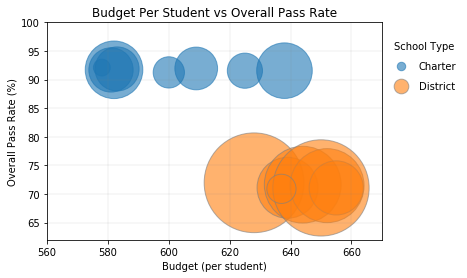

In [55]:
# DISCLAIMER : MARKER SIZE WAS ADJUSTED MANUALLY BECAUSE I HAVE QUITE MASTERED IT YET!!!

# Draw a graph to show relationship between 'budget per student' and 'overall pass rate'
# Add 3rd dimension 'School Type' as marker colour
# Add 4th dimension 'School Size' as marker size

%matplotlib inline

# Plot Per Student Budget vs Overall Pass Rate for Charter schools, set marker size as school size
h = plt.scatter(c_budget_per_stu, charter_c, marker='o', s=stu_total/1.5, alpha = 0.6)

# Set Title, Axis and Limits
plt.title("Budget Per Student vs Overall Pass Rate")
plt.xlabel("Budget (per student)")
plt.ylabel("Overall Pass Rate (%)")
plt.xlim((560, 670))
plt.ylim((62, 100))

# Add major gridlines
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Plot District schools data on graph
plt.scatter(d_budget_per_stu, district_c, marker='o', edgecolors="grey", s=stu_total*2, alpha = 0.6)

# Add legend, resize markers, remove frame and position it on the outskirts of the graph
plt.legend(['Charter', 'District'], labelspacing=1, title = 'School Type', frameon=False, loc='center left', bbox_to_anchor=(1, 0.8), markerscale=0.2);


* Students attending Charter Schools scored higher than those of district schools. 
* District schools tend to have higher budgets than Charter Schools.
* The data also suggests that higher per student budgets doesn't ensure higher overall exam success.
* School size could have an impact on its performance.

### Average Maths Score by gender per grade

In [56]:
# Create average reading score series for each gender using .loc conditions (groupby grade)
female_mg = school_data_complete.loc[school_data_complete["gender"]=="F"].groupby('grade').mean()['math_score']
male_mg = school_data_complete.loc[school_data_complete["gender"]=="M"].groupby('grade').mean()['math_score']

# create dataframe to hold variables
gender_score_sum = pd.DataFrame({"Female" : female_mg,
                                "Male" : male_mg})
gender_score_sum.sort_values(by= 'grade', ascending=False)

,Female,Male
grade,,
9th,78.805643,79.065766
12th,79.321900,78.666667
11th,79.226236,78.934388
10th,78.900350,78.983499


### Average Reading Score by gender per grade

In [57]:
# Create average reading score series for each grade using .loc conditions (groupby gender)
ninth_rg = school_data_complete.loc[school_data_complete["grade"]=="9th"].groupby('gender').mean()['reading_score']
tenth_rg = school_data_complete.loc[school_data_complete["grade"]=="10th"].groupby('gender').mean()['reading_score']
eleventh_rg = school_data_complete.loc[school_data_complete["grade"]=="11th"].groupby('gender').mean()['reading_score']
twelfth_rg = school_data_complete.loc[school_data_complete["grade"]=="12th"].groupby('gender').mean()['reading_score']

# Create dataframe
reading_score_sum = pd.DataFrame({"9th" : ninth_rg,
                                   "10th" : tenth_rg,
                                   "11th" : eleventh_rg,
                                   "12th" : twelfth_rg})
reading_score_sum

,9th,10th,11th,12th
gender,,,,
F,81.940238,82.148696,81.903128,81.995935
M,81.888460,81.594235,81.867511,81.644966


Overall, females tend to slightly higher than males in reading.

### Gender Percentage per School Type

In [58]:
# group original(merged data set) by school type and gender
summary_sch = school_data_complete.groupby(['type','gender']).count()

# calculate the count of each gender
by_gender = summary_sch['Student ID']

# create Charter dataframe
charterSumm = pd.DataFrame({"Gender": (by_gender/12194)*100})
charterSummary = charterSumm.drop(['District'])

# create District dataframe
districtSumm = pd.DataFrame({"Gender": (by_gender/26976)*100})
districtSummary = districtSumm.drop(['Charter'])

# Concatenate districts and charter dataframes
char_dist_summ = [charterSummary, districtSummary]
pd.concat(char_dist_summ)

Gender
type     gender           
Charter  F       50.713466
         M       49.286534
District F       50.233541
         M       49.766459

Gender make-up of schools is close to homogeneous.